In [1]:
import os
print(os.getcwd())
try:
    os.chdir(r'F:\Dropbox\Work\Data\behavioral\attention\StatisticalRegularities\locations\Salience\Exp4\beh')
except:
    os.chdir('/Users/michlf/Dropbox/Work/Data/behavioral/attention/StatisticalRegularities/locations/Salience/Exp4/beh')
print(os.getcwd())

/Users/michlf/Documents/GitHub/tutorials
/Users/michlf/Dropbox/Work/Data/behavioral/attention/StatisticalRegularities/locations/Salience/Exp4/beh


In [2]:
import pandas as pd
fields = ['responseTime', 'subject_nr','cond_probLocation', 'correct', 'cond_disPresent',
          'cond_congruency', 'cond_disProbability','cond_salience'] # leave None if all columns are needed
noTrials = 1920 # if the dataset has an additional row (e.g. when questions were stored), leave None else

In [3]:
data = []
for i in range(1,len([s for s in os.listdir(os.getcwd()) if 'subject-' in s]) + 1):
    d = pd.read_csv('subject-{0}.csv'.format(i), sep=',', usecols=fields)
    if noTrials and len(d) > noTrials:
        d = d[:noTrials]
    data.append(d)

data = pd.concat(data, join='inner', ignore_index=True) # 'inner' to only get shared columns
data.tail()

,cond_congruency,cond_disPresent,cond_disProbability,cond_probLocation,cond_salience,correct,responseTime,subject_nr
24955,incongruent,present,highProb,highProb,high,1,894.053558,13
24956,congruent,present,highProb,highProb,high,1,1108.430995,13
24957,incongruent,absent,highProb,highProb,high,1,753.373405,13
24958,incongruent,absent,lowProb4,lowProb,low,1,784.628035,13
24959,congruent,absent,lowProb4,lowProb,high,1,710.445513,13


In [4]:
import numpy as np
# Do some manual filters
data['RT < 200ms > 1200'] = np.where( (data['responseTime']<200) | (data['responseTime']>1200), 1, 0)
data.head()

,cond_congruency,cond_disPresent,cond_disProbability,cond_probLocation,cond_salience,correct,responseTime,subject_nr,RT < 200ms > 1200
0,congruent,present,lowProb4,lowProb,high,0,1500.019884,1,1
1,incongruent,absent,highProb,highProb,high,1,1172.072368,1,0
2,congruent,present,highProb,highProb,high,1,1201.737551,1,1
3,incongruent,present,lowProb6,lowProb,low,1,1027.585048,1,0
4,congruent,present,highProb,highProb,low,0,1500.026298,1,1


In [5]:
# Save it
data.to_excel("allData.xlsx", index=False)

In [6]:
import matplotlib.pyplot as plt
dataDis = pd.pivot_table(data[ ( data.cond_disPresent == "present") & (data.correct == 1)],
                         values="responseTime", index="subject_nr", columns=["cond_salience", "cond_probLocation"])
dataDis

cond_salience            high                     low            
cond_probLocation    highProb     lowProb    highProb     lowProb
subject_nr                                                       
1                  824.651120  899.982489  839.768624  901.460610
2                  782.356770  812.047469  757.960925  845.509036
3                  807.922262  812.137827  792.609346  780.325767
4                  803.983372  861.041960  804.622161  814.426336
5                  674.832914  748.118386  683.388273  748.696645
6                  697.373663  788.734652  751.045699  843.113666
7                  826.124212  828.458528  802.065004  805.353245
8                  962.444859  999.108516  967.801421  954.623486
9                  766.269140  804.339858  786.923582  805.228082
10                 919.560959  979.299631  910.386089  949.047921
11                 824.239564  827.281796  800.649249  808.871270
12                 726.509196  751.381659  711.556326  739.052969
13                 921.070995  967.386335  927.927584  937.596907

In [7]:
dataDis = pd.melt( dataDis.reset_index(),id_vars="subject_nr", value_name="responseTime")
dataDis

,subject_nr,cond_salience,cond_probLocation,responseTime
0,1,high,highProb,824.651120
1,2,high,highProb,782.356770
2,3,high,highProb,807.922262
3,4,high,highProb,803.983372
4,5,high,highProb,674.832914
5,6,high,highProb,697.373663
6,7,high,highProb,826.124212
7,8,high,highProb,962.444859
8,9,high,highProb,766.269140
9,10,high,highProb,919.560959


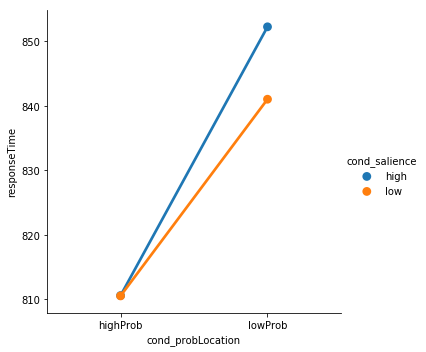

In [8]:
import seaborn as sns
ax = sns.catplot(x="cond_probLocation", y="responseTime", hue="cond_salience", kind="point",
            ci=None, units="responseTime", data=dataDis)